In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, preprocessing
from scipy import stats

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Methods


https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqhow-are-the-likelihood-ratio-wald-and-lagrange-multiplier-score-tests-different-andor-similar/#:~:text=The%20Wald%20test%20works%20by,are%20simultaneously%20equal%20to%20zero




## Data

In [2]:
## Generate two groups of example data with some normally distributed noise
g1_count = 100  # group 1 number of datapoints
g2_count = 100  # group 2 number of datapoints

x1 = np.arange(15, 25, 10/g1_count)  # array of x values for group 1
y1 = 1000*x1 + 3000 + 1000*np.random.normal(loc=0, scale=3, size=g1_count)  # array of x values for group 2

x2 = np.arange(0, 10, 10/g2_count)  # array of y values for group 1
y2 = 1400*x2 + 3000 + 1000*np.random.normal(loc=0, scale=3, size=g2_count)  # array of y values for group 2

df = pd.DataFrame({"x1": x1, "x2": x2, "y1": y1, "y2": y2})  # create dataframe

(array([ 4.,  6., 14.,  9., 17., 13., 20.,  9.,  5.,  3.]),
 array([18895.31807737, 20795.52447146, 22695.73086555, 24595.93725964,
        26496.14365372, 28396.35004781, 30296.5564419 , 32196.76283599,
        34096.96923008, 35997.17562417, 37897.38201826]),
 <BarContainer object of 10 artists>)

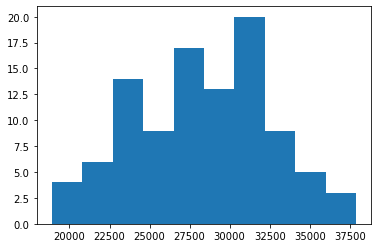

In [3]:
plt.hist(df["y1"])

In [4]:
df

,x1,x2,y1,y2
0,20.0,0.0,22792.822005,5313.098288
1,20.1,0.1,26459.124338,5625.180386
2,20.2,0.2,19802.638625,5508.647415
3,20.3,0.3,21090.705280,3460.176732
4,20.4,0.4,18895.318077,6258.957742
...,...,...,...,...
95,29.5,9.5,31965.628634,18241.950982
96,29.6,9.6,31399.471283,10228.811280
97,29.7,9.7,36577.126214,16367.372895
98,29.8,9.8,27306.618185,14314.752284


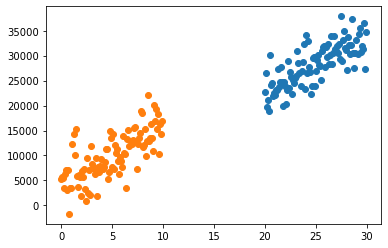

In [5]:
## Scatterplot of data
fig, ax = plt.subplots()

ax.scatter(x1,y1)
ax.scatter(x2,y2)

## Linear models validation

Notation used for linear regression
$$\hat{y} (w, x) = \beta_0 + \beta_1x_1 + ... + \beta_px_p$$

Where:
* $\hat{y}$ = predicted value
* $\beta_0$ = intercept
* $(\beta_1...\beta_p)$ = coefficients
* $(x_1...x_p)$ = dimensions

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning (Vol. 103). Springer New York. https://doi.org/10.1007/978-1-4614-7138-7

### Seperate Models

#### Scikit-learn model

In [6]:
lm1_sk = linear_model.LinearRegression().fit(x1.reshape(-1,1), y1.reshape(-1,1))
lm2_sk = linear_model.LinearRegression().fit(x2.reshape(-1,1), y2.reshape(-1,1))
print(f" y = {lm1_sk.coef_[0][0]}x + {lm1_sk.intercept_[0]}")
print(f" y = {lm2_sk.coef_[0][0]}x + {lm2_sk.intercept_[0]}")

 y = 1113.8482281427628x + 487.13648637395454
 y = 1204.2230866238174x + 4021.490250035041


#### Statsmodels model

Endog is the dependent variable while exog is the independent variable

In [7]:
x1s = df["x1"]
x2s = df["x2"]

x1s = sm.add_constant(x1s) # add column of ones to include intercept term in model
x2s = sm.add_constant(x2s) # add column of ones to include intercept term in model

lm1_sm = sm.OLS(endog=df["y1"], exog=x1s).fit()
lm2_sm = sm.OLS(endog=df["y2"], exog=x2s).fit()

C:\Users\Trevor\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
lm1_sm.params

const     487.136486
x1       1113.848228
dtype: float64

In [9]:
lm1_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           5.46e-20
Time:                        13:34:09   Log-Likelihood:                -934.04
No. Observations:                 100   AIC:                             1872.
Df Residuals:                      98   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        487.1365   2422.134      0.201      0.841   -4319.510    5293.783
x1          1113.8482     96.436     11.550      0.000     922.474    1305.223
==============================================================================
Omnibus:                        1.073   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.871
Skew:                           0.229   Prob(JB):                        0.647
Kurtosis:                       3.002   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
lm2_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           9.35e-18
Time:                        13:34:09   Log-Likelihood:                -951.25
No. Observations:                 100   AIC:                             1906.
Df Residuals:                      98   BIC:                             1912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4021.4903    656.376      6.127      0.000    2718.934    5324.047
x2          1204.2231    114.547     10.513      0.000     976.908    1431.538
==============================================================================
Omnibus:                        3.342   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.755
Skew:                           0.287   Prob(JB):                        0.252
Kurtosis:                       3.576   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
lm1_sm.bse

const    2422.134027
x1         96.436243
dtype: float64

In [12]:
lm1_sm.pvalues

const    8.410226e-01
x1       5.464066e-20
dtype: float64

#### Statsmodel model 2

In [13]:
lm1_b = smf.ols(formula="y1 ~ x1", data=df).fit()
lm1_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           5.46e-20
Time:                        13:34:09   Log-Likelihood:                -934.04
No. Observations:                 100   AIC:                             1872.
Df Residuals:                      98   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    487.1365   2422.134      0.201      0.841   -4319.510    5293.783
x1          1113.8482     96.436     11.550      0.000     922.474    1305.223
==============================================================================
Omnibus:                        1.073   Durbin-Watson:                   2.240
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.871
Skew:                           0.229   Prob(JB):                        0.647
Kurtosis:                       3.002   Cond. No.                         219.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Scipy stats model

In [14]:
lm1_sp = stats.linregress(x=x1, y=y1, alternative='two-sided')
lm2_sp = stats.linregress(x=x2, y=y2, alternative='two-sided')
print(f" y = {lm1_sp.slope}x + {lm1_sp.intercept}")
print(f" y = {lm2_sp.slope}x + {lm2_sp.intercept}")

 y = 1113.848228142763x + 487.13648637394726
 y = 1204.2230866238183x + 4021.4902500350363


### 3D Model

# Ancova

ANCOVA is a specific type of linear regression descrimination

http://www.biostathandbook.com/ancova.html

https://web.archive.org/web/20230223045335/http://www.biostathandbook.com/ancova.html

https://www.reneshbedre.com/blog/ancova.html

https://web.archive.org/web/20230201184317/https://www.reneshbedre.com/blog/ancova.html

https://www.statology.org/ancova/

https://statisticsbyjim.com/regression/comparing-regression-lines/

## Application and Assumptions

Used to test for significance between different linear models that include at least one continuous and one categorical independent variable. Test will determine if model is a better fit when including the catagorical term than without.

>Null hypotheses:
>* Slopes of regression lines are all equal
>* Y intercepts of regression lines are all the same/ adjusted means of the group (least squares means) are the same


>Assumptions:
>* Linear relationship between dependent variable and covariate
>* Normally distributed residuals
>* Dependent variable and covariate are continuous
>* Equal variances (homogeneity) between sample populations
>* No interaction between categorical independent variable and covariate (homogeneity within-group regression slopes) i.e. slopes of lineas in different samples should be the same

## Prepare Data

Because the different variables have different units and therefore drastically different distances, the data should be normalized so distances are more meaningful to the model. Z-score is a common method for normalizing data assumed to be normally distributed.

$$Z = \frac{x - \mu}{\sigma}$$
Where:
* $Z$ = standard score
* $x$ = observed value
* $\mu$ = sample mean
* $\sigma$ = sample standard deviation

In [15]:
## Sample data for ANCOVA, combines x and y values to a single column each and adds a categorical column
x_c = np.concatenate((x1, x2))
y_c = np.concatenate((y1, y2))

x_zscore = stats.zscore(x_c)
y_zscore = stats.zscore(y_c)

group_list = np.concatenate((np.array((len(x1)*["A"])),np.array((len(x2)*["B"]))))

df_c = pd.DataFrame({"x": x_zscore, "y": y_zscore, "group": group_list})

df_c

,x,y,group
0,0.485190,0.359091,A
1,0.494798,0.718526,A
2,0.504406,0.065942,A
3,0.514013,0.192220,A
4,0.523621,-0.023010,A
...,...,...,...
195,-0.523621,-0.087064,B
196,-0.514013,-0.872651,B
197,-0.504406,-0.270843,B
198,-0.494798,-0.472076,B


In [16]:
lm_ancova = smf.ols('y ~ group + x', data=df_c).fit()  # Additive moderation model
lm_ancova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1019.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          1.27e-104
Time:                        13:34:10   Log-Likelihood:                -40.915
No. Observations:                 200   AIC:                             87.83
Df Residuals:                     197   BIC:                             97.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2395      0.079     -3.026      0.003      -0.396      -0.083
group[T.B]     0.4790      0.153      3.140      0.002       0.178       0.780
x              1.1827      0.076     15.506      0.000       1.032       1.333
==============================================================================
Omnibus:                        4.263   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.995
Skew:                           0.257   Prob(JB):                        0.136
Kurtosis:                       3.464   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
lm_ancova.pvalues

Intercept     2.812540e-03
group[T.B]    1.950807e-03
x             5.714986e-36
dtype: float64

If the p-values are less than an arbitrarily defined (but conventional) 0.05, the null hypothesis is rejected and the linear regressions are likely to be different from each other.

## Test for normal residuals

In [18]:
resid_ancova = lm_ancova.resid
resid_ancova

0      0.024744
1      0.372816
2     -0.291131
3     -0.176215
4     -0.402808
         ...   
195    0.292734
196   -0.504216
197    0.086230
198   -0.126367
199    0.122904
Length: 200, dtype: float64

(array([ 4., 10., 16., 40., 55., 39., 17., 12.,  4.,  3.]),
 array([-0.79847419, -0.62595638, -0.45343858, -0.28092078, -0.10840297,
         0.06411483,  0.23663264,  0.40915044,  0.58166824,  0.75418605,
         0.92670385]),
 <BarContainer object of 10 artists>)

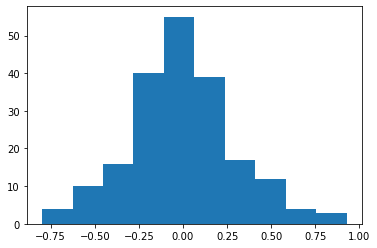

In [19]:
plt.hist(lm_ancova.resid)

### Jarque-Bera Test

Tests if skewness and kurtosis of data are similar to a normal distrubution. If test statistic is close to zero an the p-value is above some predetermined value (typically 0.05), the data is assumed to be normal.

In [20]:
test_result_names = ['Jarque-Bera', 'JB_p_value', 'Skew', 'Kurtosis']
jb_test = sm.stats.stattools.jarque_bera(resid_ancova, axis=0)
jb_results = dict(zip(test_result_names, jb_test))
jb_results

{'Jarque-Bera': 3.9954486701876157,
 'JB_p_value': 0.13564361168429737,
 'Skew': 0.2570835337670763,
 'Kurtosis': 3.4637737240140325}

### Shapiro-Wilk test for normality

p-value may not be accurate with more than 5000 datapoints

In [21]:
stats.shapiro(resid_ancova)

ShapiroResult(statistic=0.9892200231552124, pvalue=0.13715454936027527)

### D'Agostino and Pearson's test for normality

In [22]:
stats.normaltest(resid_ancova)

NormaltestResult(statistic=4.263077582869462, pvalue=0.11865456866653436)

## Test for equal variances between groups

### Bartlett's test for equal variances

In [23]:
stats.bartlett(df["y1"], df["y2"])

BartlettResult(statistic=1.4159882785696385, pvalue=0.23406484296851504)

## Test for interaction of catagorical independent variable and covariate

In [35]:
sm.stats.anova_lm(lm_ancova, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
group,1.0,160.853272,160.853272,1797.424568,5.615502e-101
x,1.0,21.517007,21.517007,240.437739,5.714986e-36
Residual,197.0,17.629721,0.089491,NaN,NaN


In [36]:
#sm.stats.anova_lm(lm_ancova, typ=2)

,sum_sq,df,F,PR(>F)
group,0.882226,1.0,9.858273,1.950807e-03
x,21.517007,1.0,240.437739,5.714986e-36
Residual,17.629721,197.0,NaN,NaN


In [25]:
lm_inter = smf.ols('y ~ group * x', data=df_c).fit()  # linear interaction model
lm_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     677.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          3.82e-103
Time:                        13:34:10   Log-Likelihood:                -40.729
No. Observations:                 200   AIC:                             89.46
Df Residuals:                     196   BIC:                             102.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1952      0.108     -1.807      0.072      -0.408       0.018
group[T.B]       0.4790      0.153      3.135      0.002       0.178       0.780
x                1.1366      0.108     10.520      0.000       0.924       1.350
group[T.B]:x     0.0922      0.153      0.604      0.547      -0.209       0.394
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.334
Skew:                           0.268   Prob(JB):                        0.115
Kurtosis:                       3.483   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PR(> F) – This is the p-value associated with the F statistic of a given effect and test statistic

In [26]:
sm.stats.anova_lm(lm_inter, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.293007,1.0,3.263591,7.236772e-02
group,0.882226,1.0,9.826460,1.984581e-03
x,9.935971,1.0,110.669349,8.321008e-21
group:x,0.032706,1.0,0.364284,5.468342e-01
Residual,17.597016,196.0,NaN,NaN


Least squares model for y as a function of "group", and "x", and "the interaction between x and group".

$$y = x\beta_1 + group\beta_2 + x*group\beta_3 + \beta_0$$

Where "group" can be a catagory/indicator (0 or 1) or a continuous variable

In [27]:
lm_inter_mc = smf.ols("y ~ group + x + x:group", data=df_c).fit()  # linear interaction model, alternate notation
lm_inter_mc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     677.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):          3.82e-103
Time:                        13:34:10   Log-Likelihood:                -40.729
No. Observations:                 200   AIC:                             89.46
Df Residuals:                     196   BIC:                             102.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1952      0.108     -1.807      0.072      -0.408       0.018
group[T.B]       0.4790      0.153      3.135      0.002       0.178       0.780
x                1.1366      0.108     10.520      0.000       0.924       1.350
x:group[T.B]     0.0922      0.153      0.604      0.547      -0.209       0.394
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                4.334
Skew:                           0.268   Prob(JB):                        0.115
Kurtosis:                       3.483   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sm.stats.anova_lm(lm_inter_mc, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.293007,1.0,3.263591,7.236772e-02
group,0.882226,1.0,9.826460,1.984581e-03
x,9.935971,1.0,110.669349,8.321008e-21
x:group,0.032706,1.0,0.364284,5.468342e-01
Residual,17.597016,196.0,NaN,NaN


In [29]:
sm.stats.anova_lm(lm_ancova, lm_inter)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,197.0,17.629721,0.0,NaN,NaN,NaN
1,196.0,17.597016,1.0,0.032706,0.364284,0.546834


In [30]:
sm.stats.anova_lm(lm_inter, lm_ancova)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,196.0,17.597016,0.0,NaN,NaN,NaN
1,197.0,17.629721,-1.0,-0.032706,0.365464,NaN


In [31]:

# formula = "S ~ C(E) + C(M) + X"
# lm = ols(formula, salary_table).fit()

# table1 = anova_lm(lm, interX_lm)
# print(table1)

# interM_lm = ols("S ~ X + C(E)*C(M)", data=salary_table).fit()
# print(interM_lm.summary())

# table2 = anova_lm(lm, interM_lm)
# print(table2)

# Z statistic

https://www.jstor.org/stable/2782277

https://stats.stackexchange.com/questions/435644/is-there-a-method-to-look-for-significant-difference-between-two-linear-regressi

https://stats.stackexchange.com/questions/55501/test-a-significant-difference-between-two-slope-values?noredirect=1&lq=1

**Two Sample Z-test**
>Null hypothesis: two population means are equal
>* 
    
>Inputs: 
>* dataset

>Returns: 
>* 

>Assumptions:
>* 


$$z = \frac{(\bar{x_1} - \bar{x_2})}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}$$
Standard error of the sample mean

$$\sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{n}}$$

Z-statistic for model coefficients
$$z = \frac{(\beta_1 - \beta_2)}{\sqrt{SE_1^2 + SE_2^2}}$$

* $SE$ = standard error

In [32]:
def zstat_coeff(b1, se1, b2, se2):
    return ((b1-b2)/np.sqrt(se1**2 + se2**2)) 

In [33]:
b1 = lm1_sm.params[0]
se1 = lm1_sm.bse[0]
b2 = lm2_sm.params[0]
se2 = lm2_sm.bse[0]

In [34]:
p_value = 2*sps.norm.pdf(-abs(zstat_coeff(b1,se1,b2,se2)))
p_value

NameError: name 'sps' is not defined

In [ ]:
p_value_c = 2*sps.norm.cdf(-abs(zstat_coeff(b1,se1,b2,se2)))
p_value_c

In [ ]:
# p_value = 2*pnorm(-abs(compare.coeff(b1,se1,b2,se2)))
# p_value

# ANOVA

https://stats.stackexchange.com/questions/45528/comparing-two-linear-regression-models

https://stats.stackexchange.com/questions/57492/what-test-should-be-used-to-tell-if-two-linear-regression-lines-are-significantl

# Wald Test

https://en.wikipedia.org/wiki/Wald_test

https://www.statology.org/wald-test-python/

https://andrewpwheeler.com/2021/06/18/wald-tests-via-statsmodels-python/

https://stats.stackexchange.com/questions/592311/wald-test-failing-to-reject-null-hypothesis-that-a-predictor-is-insignificant-in

https://stackoverflow.com/questions/28926922/statsmodels-wald-test-for-significance-of-trend-in-coefficients-in-linear-regr

In [ ]:
lm_c = smf.ols("y1 ~ X1 + X2", df).fit()
results.summary()

In [ ]:
results.wald_test_terms()

In [ ]:
# OLSResults.wald_test_terms(skip_single=False, extra_constraints=None, combine_terms=None, scalar=None)

# ols = sm.regression.linear_model.OLS(X,y)
ols = sm.regression.linear_model.OLS("y1 ~ X1 + X2", df)
# ols_res = ols.fit()
# ols_res.wald_test_terms()

#results = smf.ols('mpg ~ disp + carb + hp + cyl', df).fit()
#results.wald_test('(hp = 0, cyl = 0)')

# res_ols = ols("np.log(Days+1) ~ C(Duration, Sum)*C(Weight, Sum)", data).fit()
#res_ols.wald_test_terms()